In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Carprice_pred.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
#showing categorical feature

df.select_dtypes(include="object").head()




,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [8]:
#showing numeric feature

df.select_dtypes(include=["int","float"]).head()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data  cleaning


In [9]:
#sepreating car name and company name in car_name feature

df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
CompanyName = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",CompanyName)

# Now we can drop the CarName Feature.
df.drop(columns=["CarName"],inplace=True)

In [11]:
#checking company name
df["CompanyName"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
#replace correct spelling of company name with worng one

def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)
    
replace('maxda','mazda')    
replace('porcshce','porsche')    
replace('toyouta','toyota')    
replace('vokswagen','volkswagen')    
replace('vw','volkswagen')    


In [13]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
import seaborn as sns

# Explotary Data Analysis(EDA)

C:\Users\hp\AppData\Local\Temp\ipykernel_4172\1121386916.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"],color="red",kde=True)


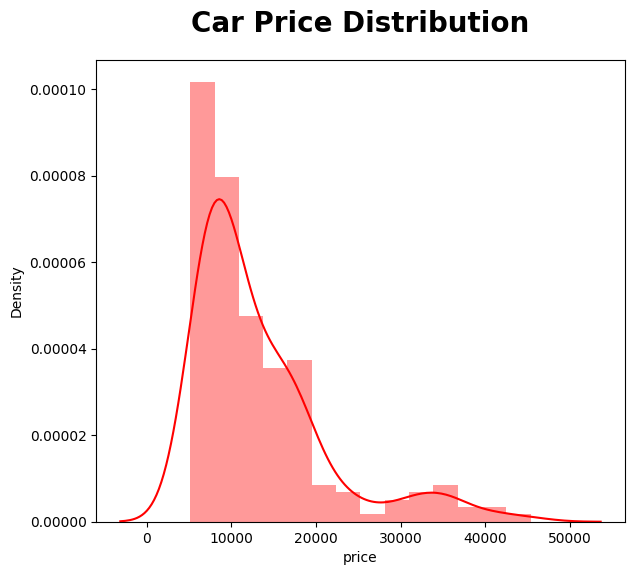

In [15]:
#visualizing target(price)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)
plt.show()


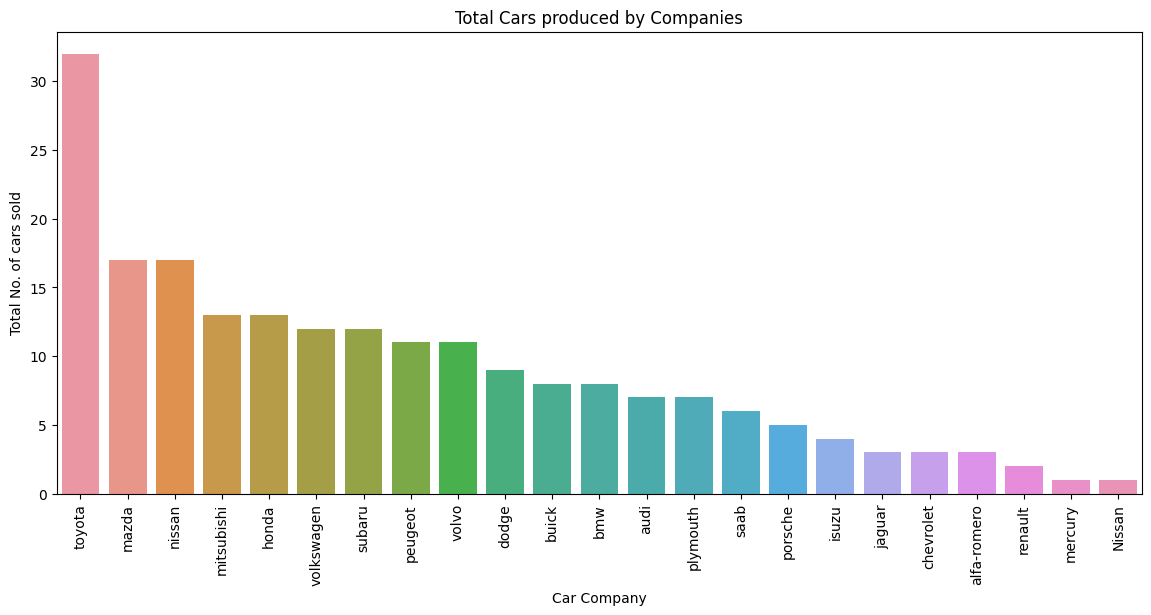

In [16]:
#visualizing which company sold highest no of cars

plt.figure(figsize=(14,6))
counts = df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies")
plt.xticks(rotation=90)
plt.show()

- as we see toyota car company sold highest no of car


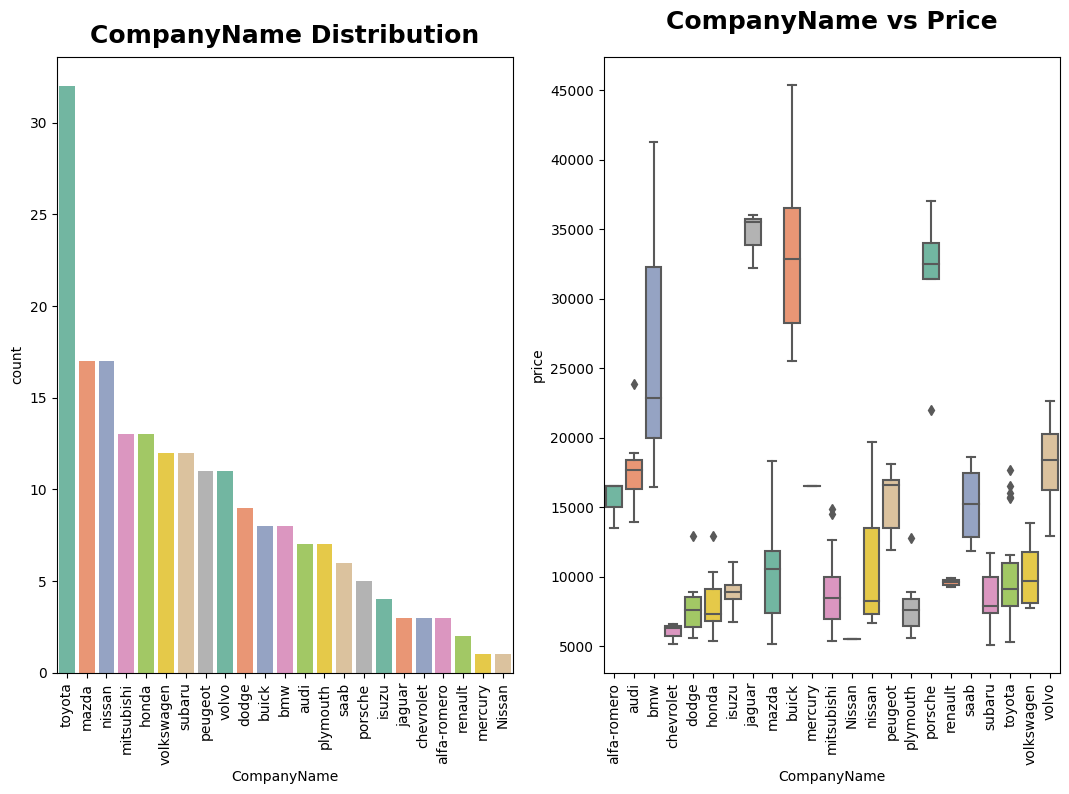

In [17]:
#visulaization categorical feature vs price


def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.show()
categorical_visualization("CompanyName")

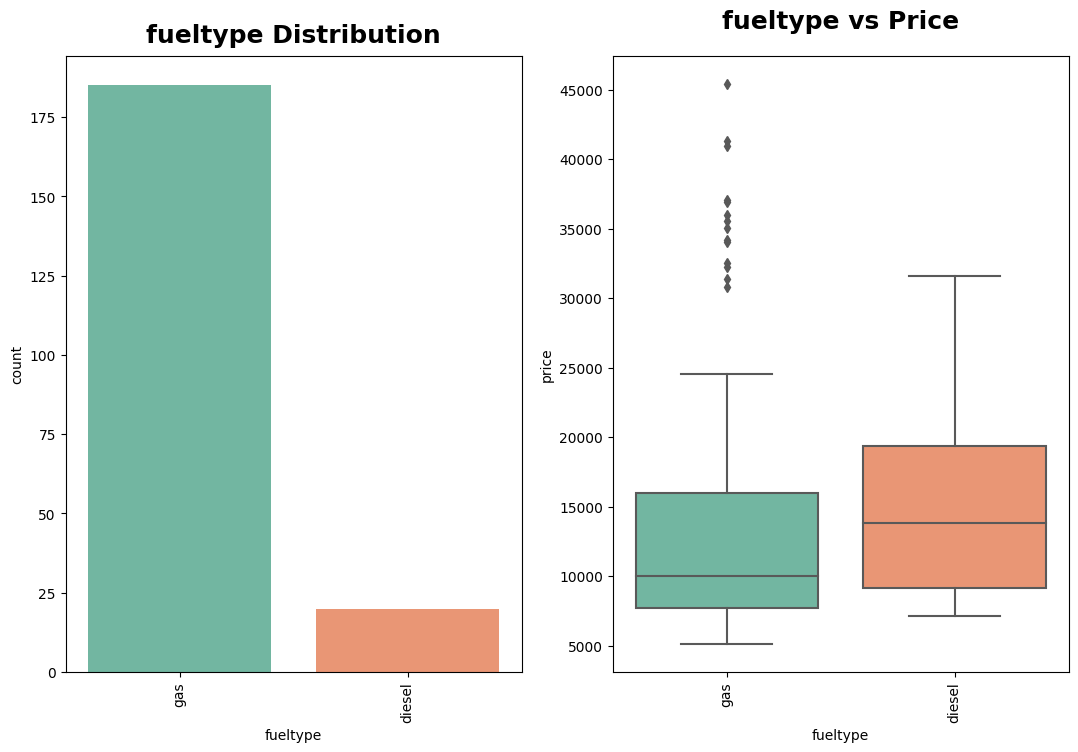

In [18]:
categorical_visualization("fueltype")

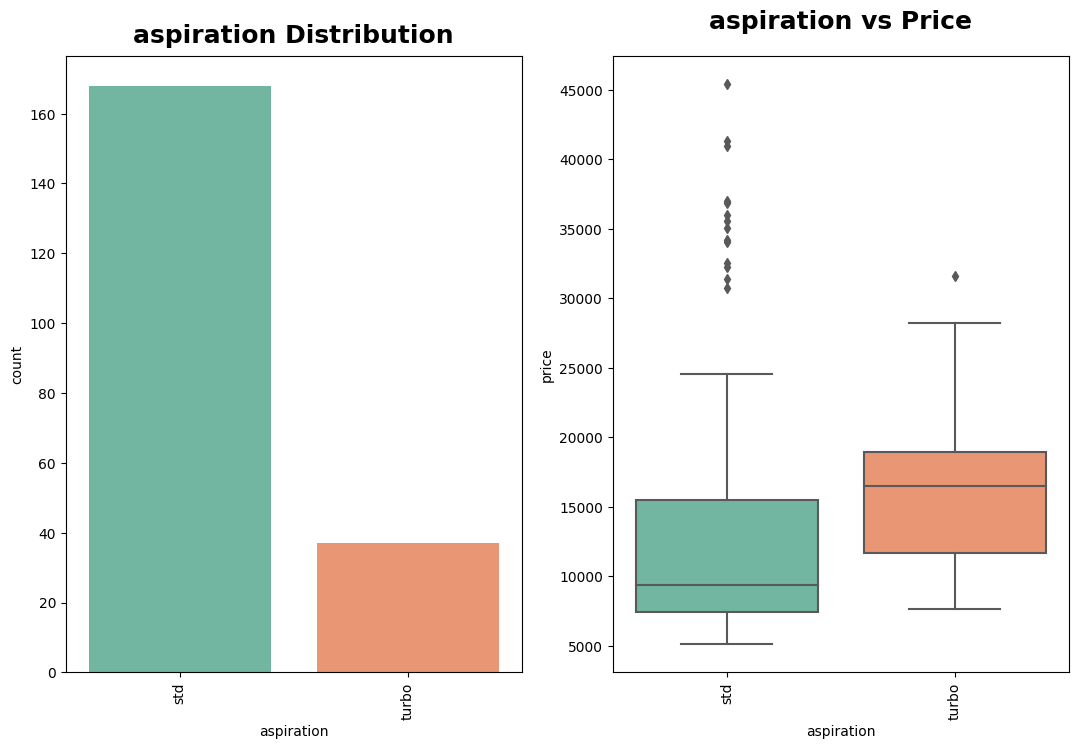

In [19]:
categorical_visualization("aspiration")

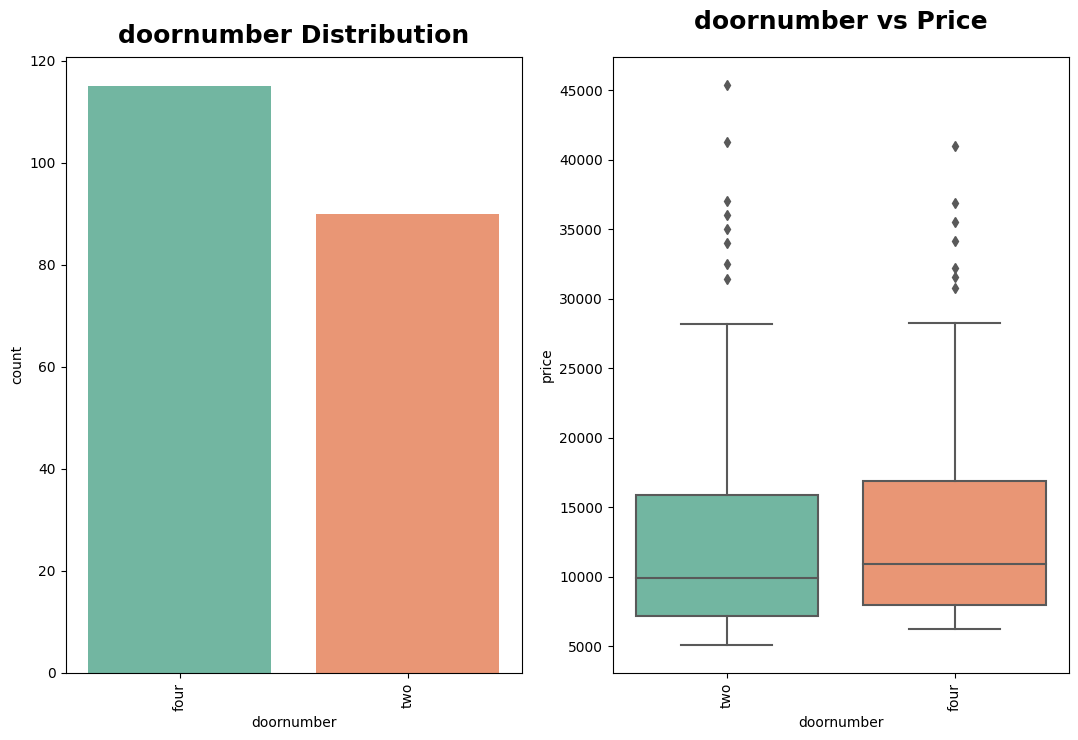

In [20]:
categorical_visualization("doornumber")

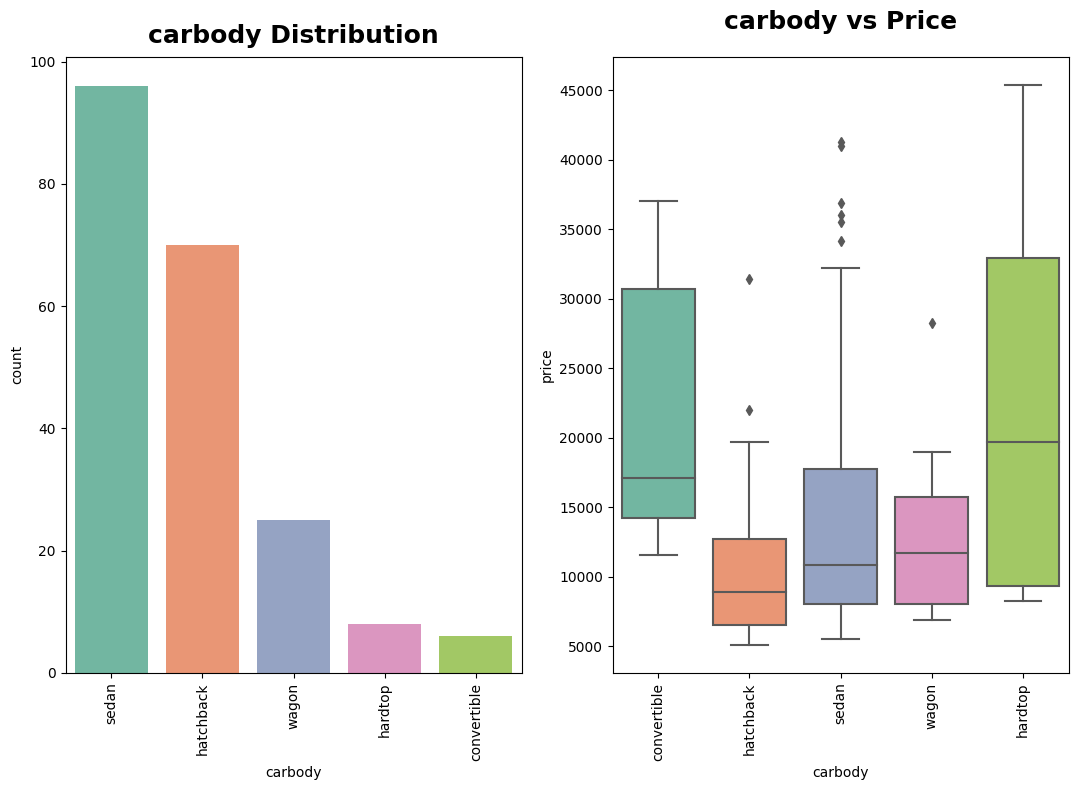

In [21]:
categorical_visualization("carbody")

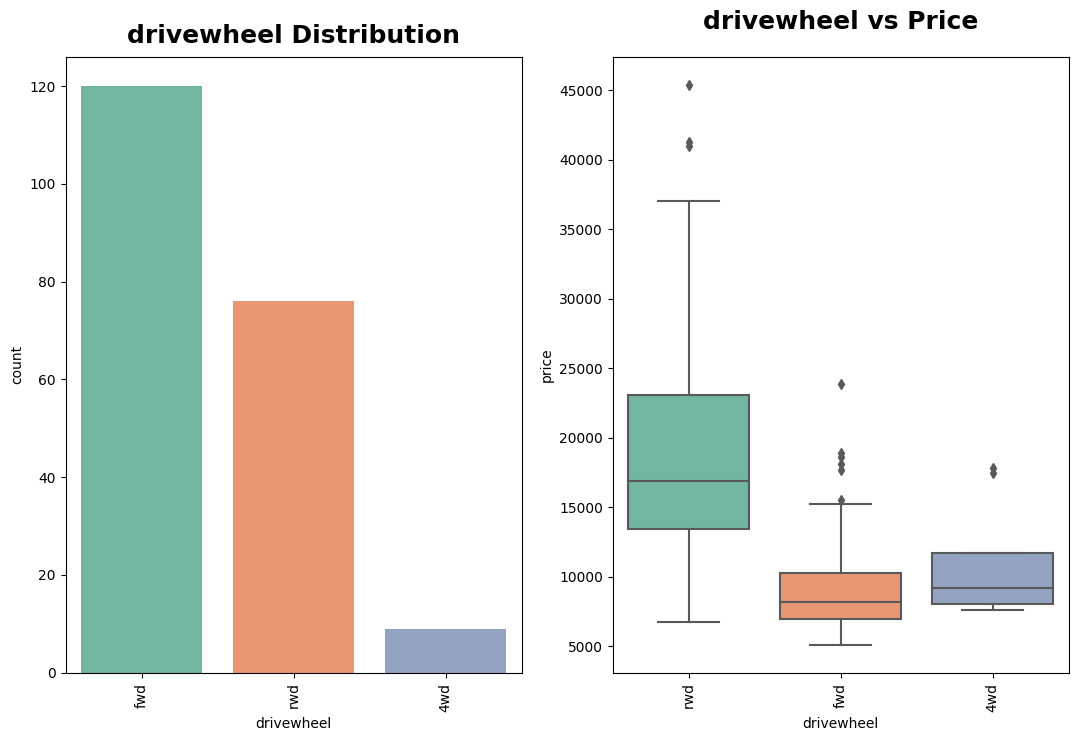

In [22]:
categorical_visualization("drivewheel")

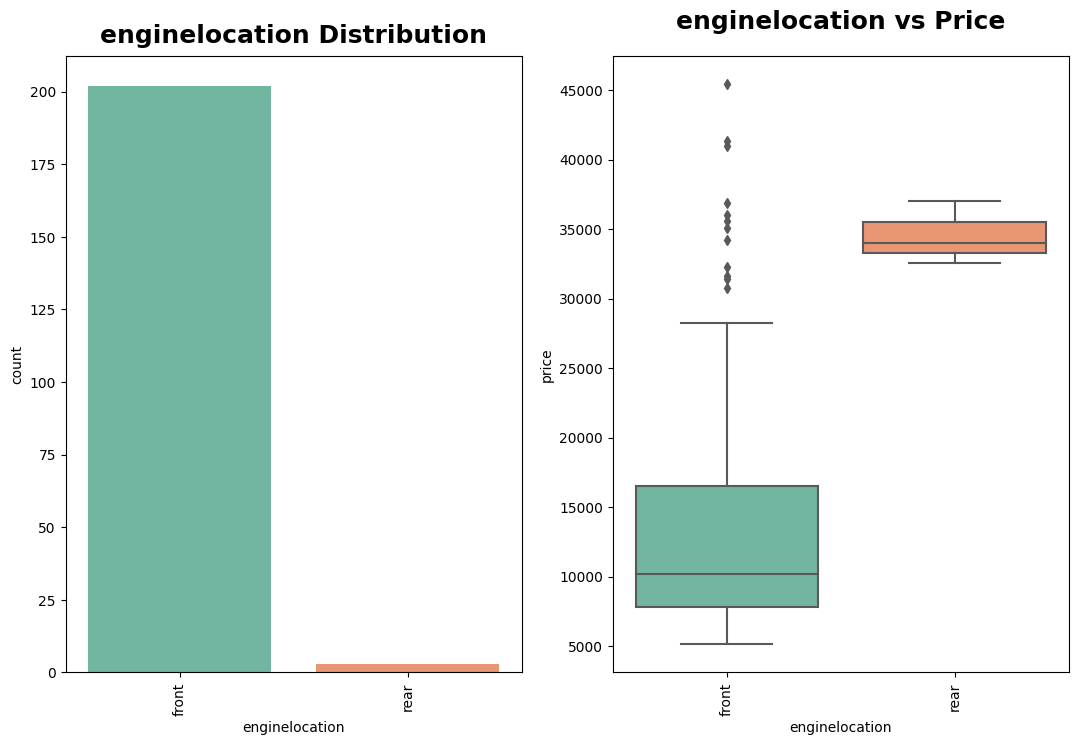

In [23]:
categorical_visualization("enginelocation")

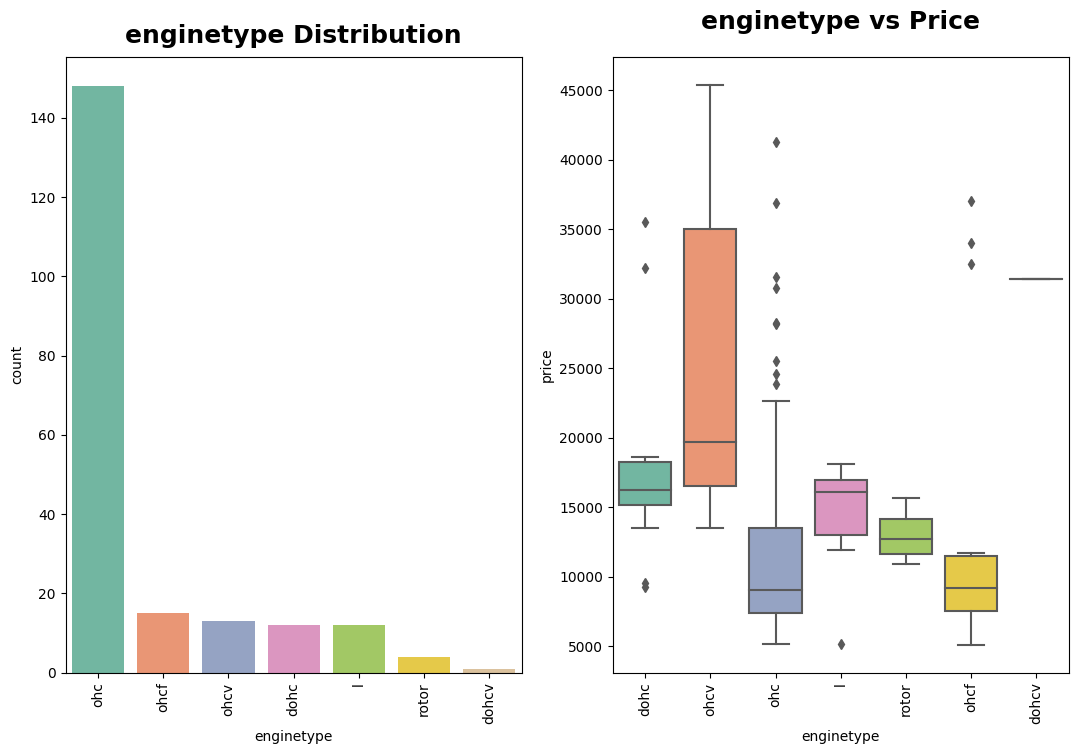

In [24]:
categorical_visualization("enginetype")

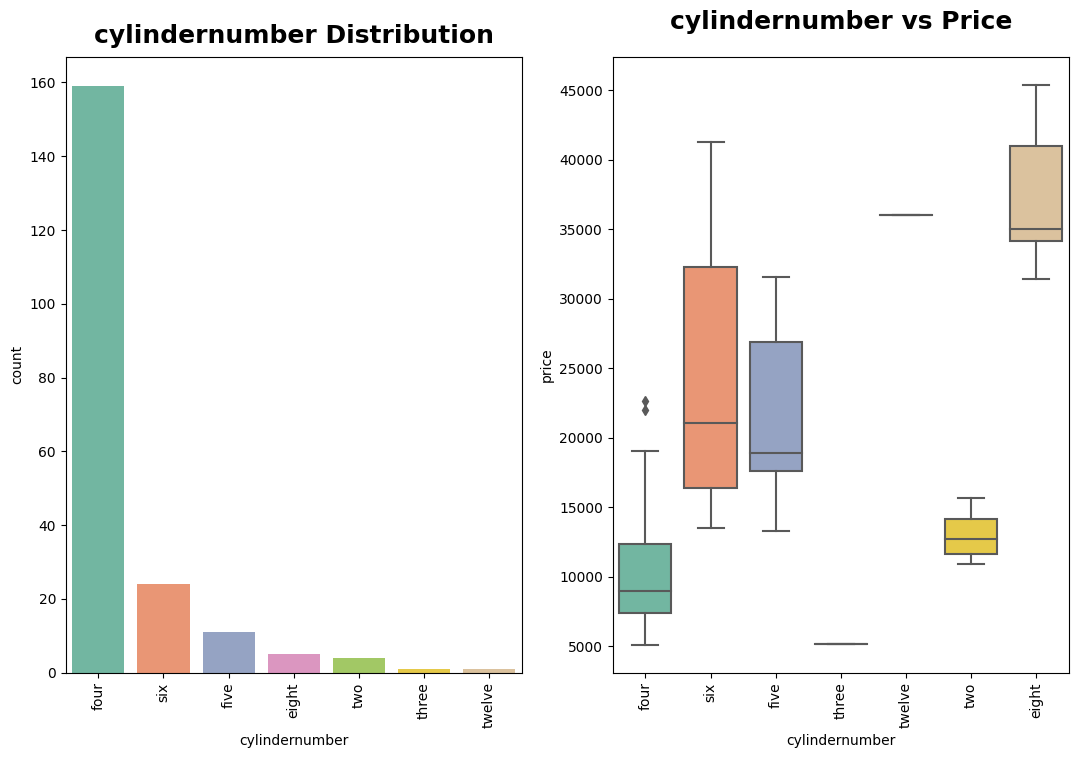

In [25]:
categorical_visualization("cylindernumber")



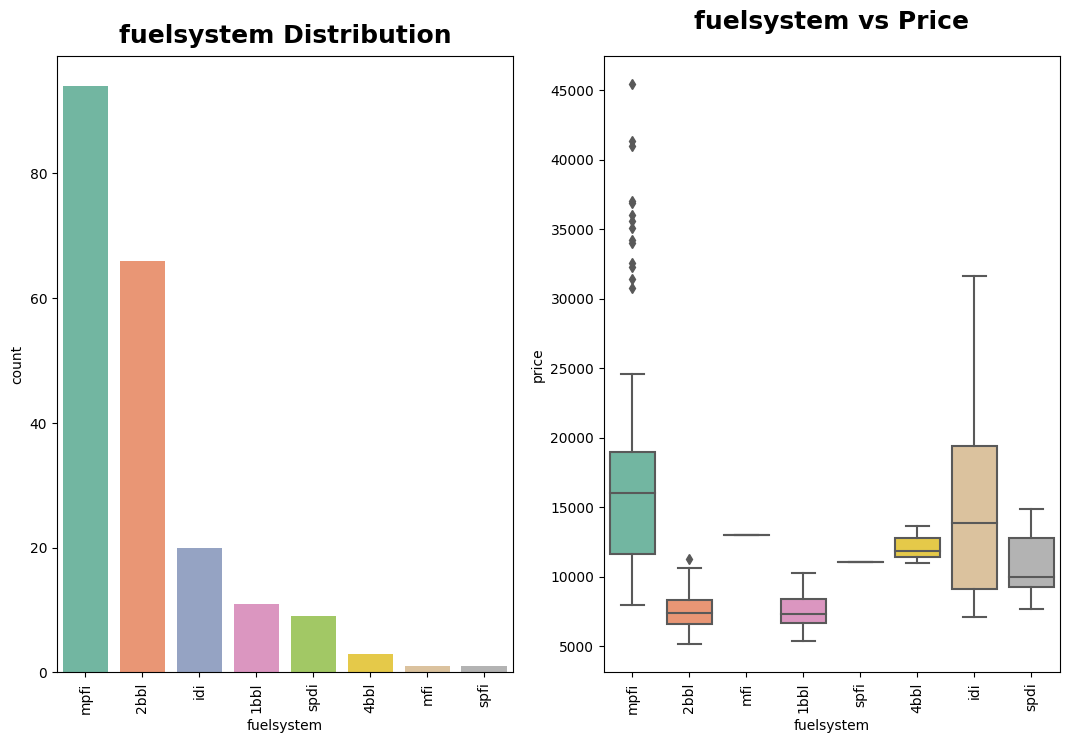

In [26]:
categorical_visualization("fuelsystem")

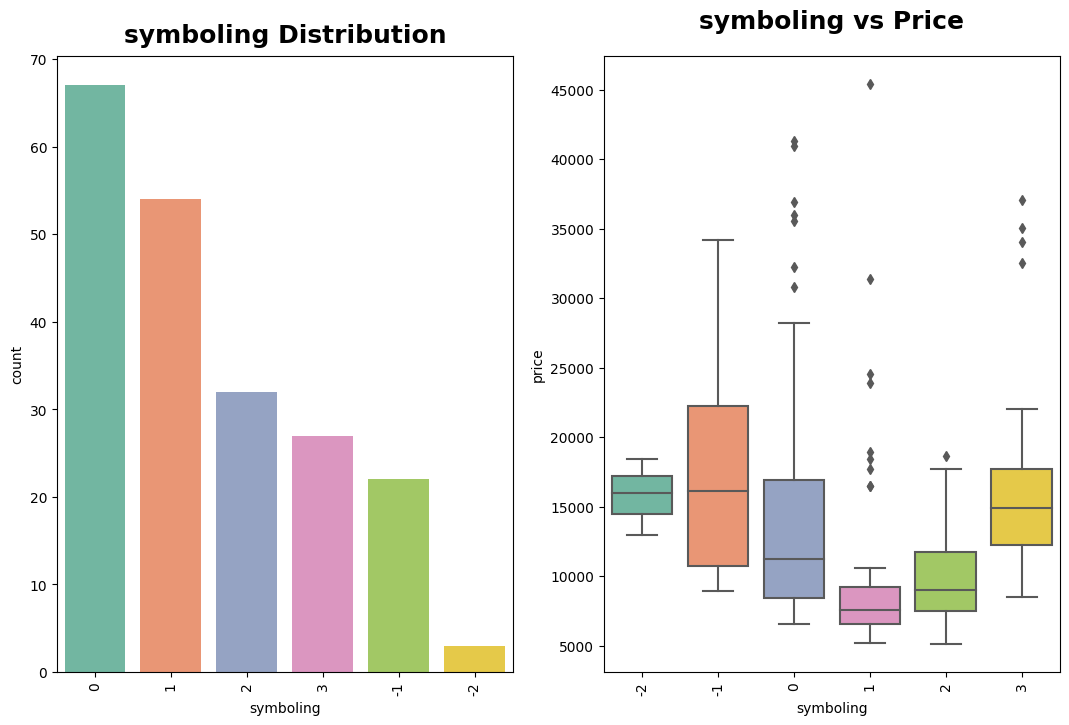

In [27]:
categorical_visualization("symboling")

In [28]:
#visualizing car length ,height,width vs price


def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

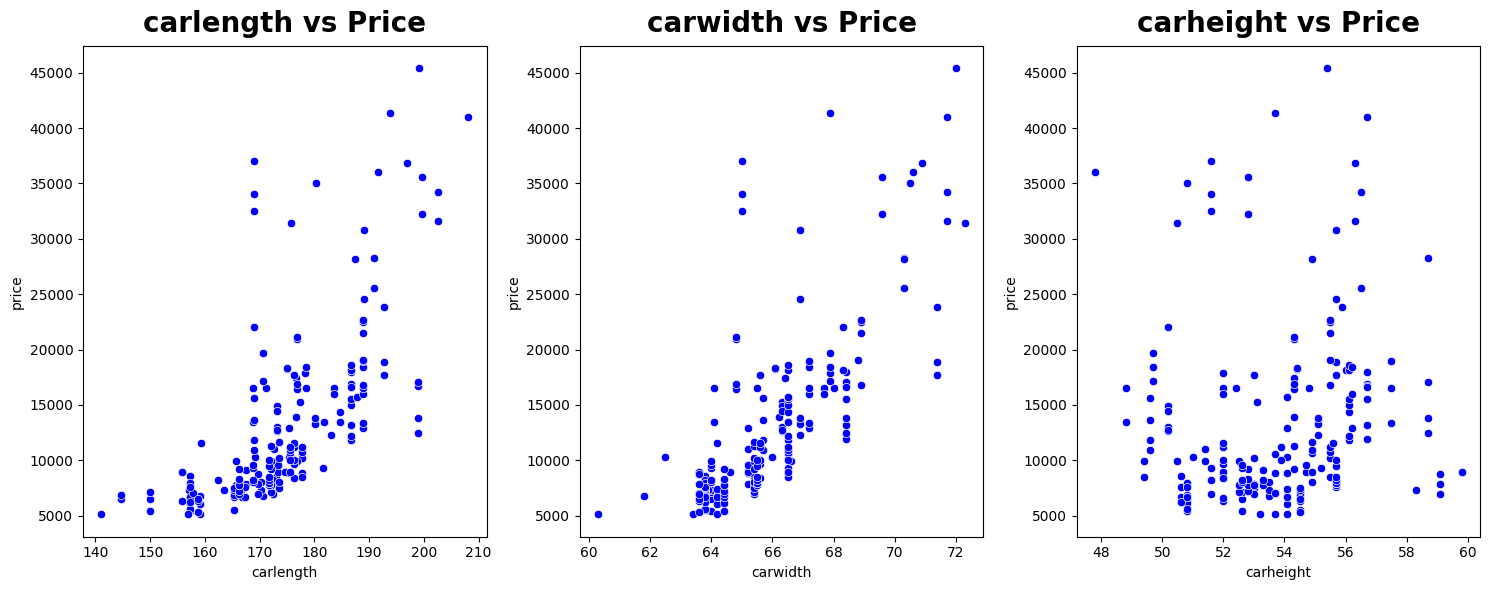

In [29]:
scatter_plot(["carlength","carwidth","carheight"])

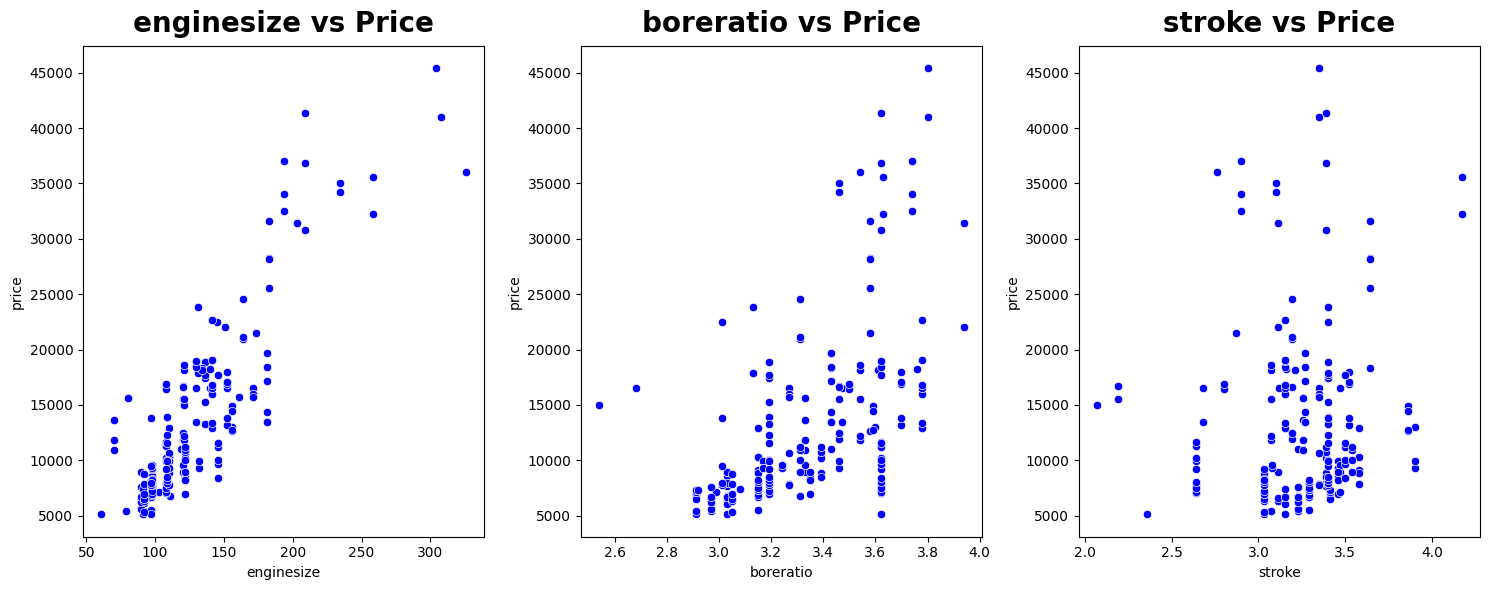

In [30]:
#visualiziation enginesize , boreratio, sttroke

scatter_plot(["enginesize","boreratio","stroke"])


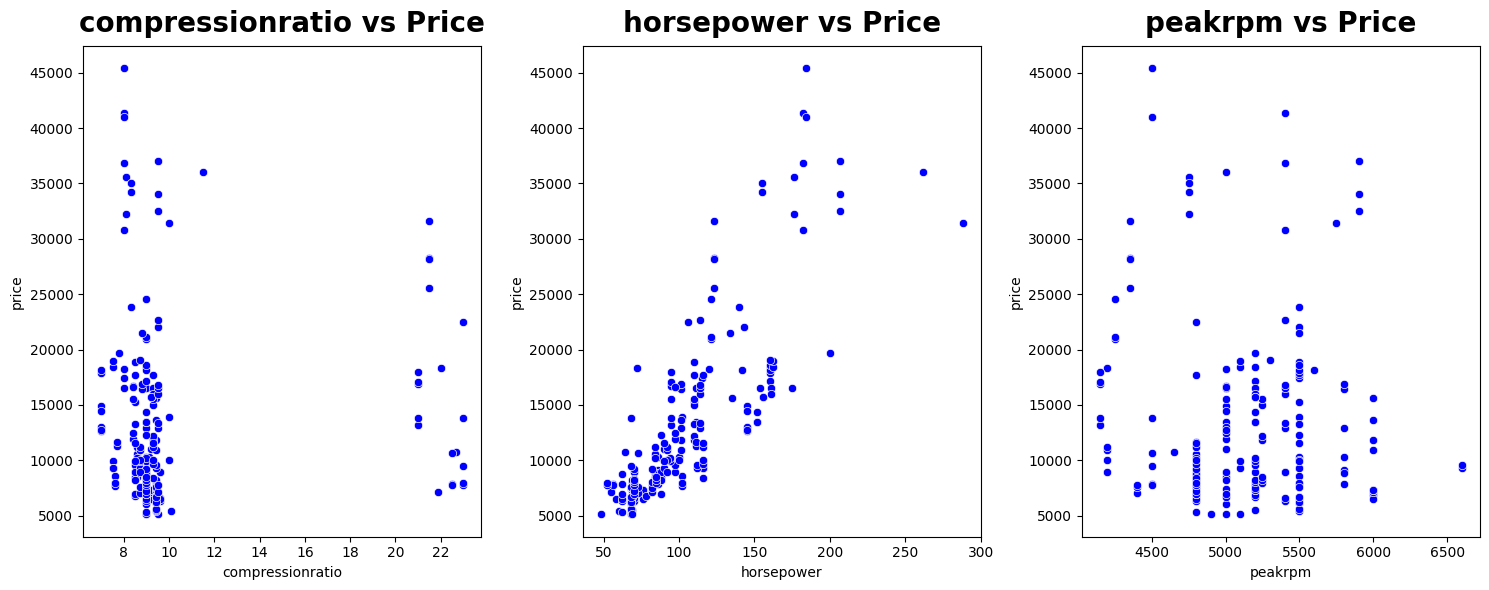

In [31]:
#visualiziation compressionratio ,horseratio , peakrpm

scatter_plot(["compressionratio","horsepower","peakrpm"])

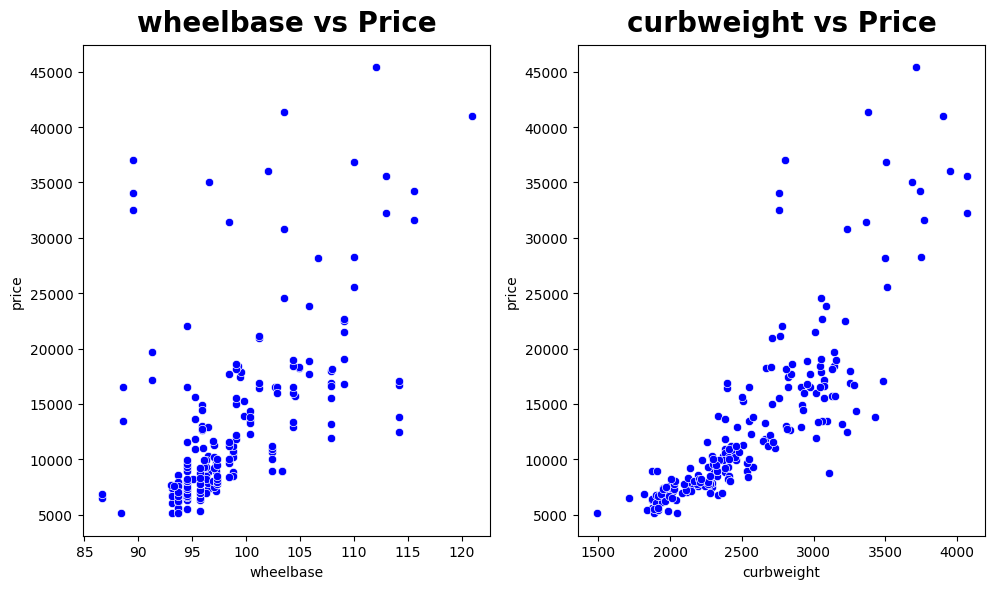

In [32]:
#visualiziation wheelbase,curbweight
scatter_plot(["wheelbase","curbweight"])

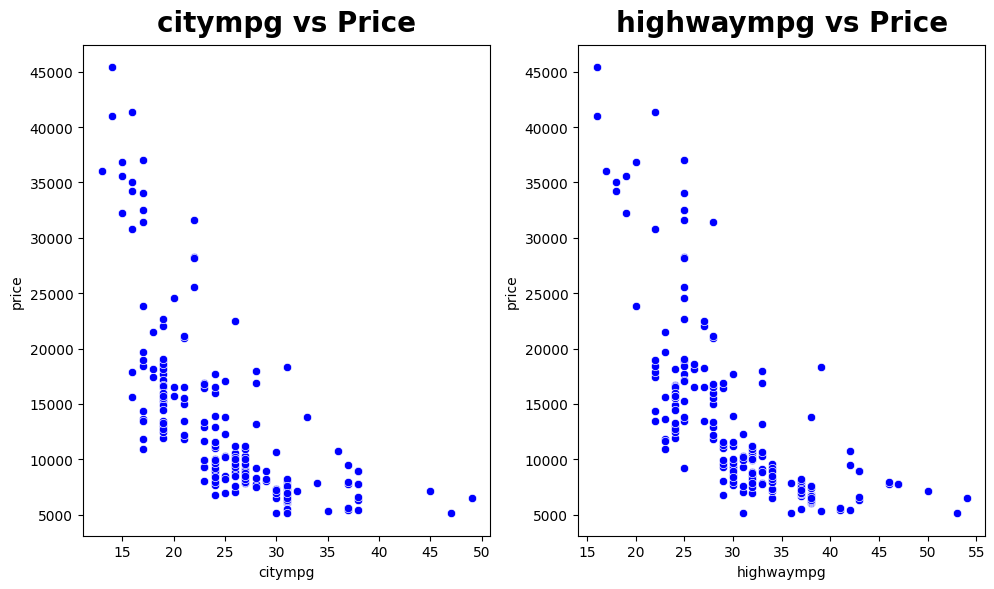

In [33]:
#visualiziation citympg and highwaympg
scatter_plot(["citympg","highwaympg"])

# Feature Enginering

In [34]:
#Deriving companyname into different price range


z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,5499.0,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,...,10704.88,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


In [35]:
df = df.merge(z.T,how="left",on="CompanyName")

In [36]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17


\
# Data preprocessing

In [37]:
#creating new dataframe using all useful feature

df1=df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price']]

In [38]:
df1

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,ohc,four,mpfi,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0
201,gas,turbo,four,sedan,rwd,ohc,four,mpfi,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0
202,gas,std,four,sedan,rwd,ohcv,six,mpfi,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,ohc,six,idi,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0


In [39]:
df1 = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"],data=df1)

In [40]:
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


Feature scaling of numeric data

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [42]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

df1[num_cols] = scaler.fit_transform(df1[num_cols])

In [43]:
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,...,0,0,0,0,0,0,0,1,0,0


# Model building


In [44]:
#selecting feature for train and test

x=df1.drop(columns="price")
y=df1.price

In [45]:
x.shape

(205, 45)

In [46]:
y.shape

(205,)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
len(x_train)

164

In [49]:
len(x_test)

41

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model=LinearRegression()

In [52]:
model.fit(x_train,y_train)

LinearRegression()

In [53]:
model.predict(x_test)

array([ 6390.15583326, 10805.12289965, 11204.8496786 , 17136.84119736,
        6380.55312686, 19546.59012961, 13231.66519912,  5865.24076826,
       12729.75781246, 10358.2295972 , 12660.22732154, 15431.52276315,
       11290.82859309, 16814.4322678 , 11638.61814524,  9906.68003356,
       30132.61733058,  9999.74471119, 14602.65922439,  5555.9632193 ,
        4007.72653228,  5626.7622741 ,  5772.56953802, 19079.17783324,
       17286.61150447, 15789.24907008,  8840.32530686,  4234.10861769,
        5552.6591077 , 12213.50428175,  4938.57119682, 10248.07649615,
       26315.37454897, 17286.61150447, 10688.99000884, 14614.81559197,
       15362.39933198, 14031.38220064, 40103.69807373, 29317.88008714,
       31886.94515277])

In [54]:
model.score(x_test,y_test)

0.8974108963331011

# Checking which model is best using gridsearchcv 

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)



array([0.78122018, 0.88770688, 0.83383251, 0.81379193, 0.90738592])

In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' :[True]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.788e+06, tolerance: 1.021e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+07, tolerance: 1.110e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

,model,best_score,best_params
0,linear_regression,0.844787,{'copy_X': True}
1,lasso,0.846793,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.874273,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [57]:
import pickle
with open('carprice_pred.pickle','wb')as f:
    pickle.dump(model,f)

export columns information to the file that will useful later on our predection application


In [58]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [59]:
for column in x.columns:
    print(column)

wheelbase
carlength
carwidth
curbweight
enginesize
boreratio
horsepower
citympg
highwaympg
fueltype_diesel
fueltype_gas
aspiration_std
aspiration_turbo
doornumber_four
doornumber_two
carbody_convertible
carbody_hardtop
carbody_hatchback
carbody_sedan
carbody_wagon
drivewheel_4wd
drivewheel_fwd
drivewheel_rwd
enginetype_dohc
enginetype_dohcv
enginetype_l
enginetype_ohc
enginetype_ohcf
enginetype_ohcv
enginetype_rotor
cylindernumber_eight
cylindernumber_five
cylindernumber_four
cylindernumber_six
cylindernumber_three
cylindernumber_twelve
cylindernumber_two
fuelsystem_1bbl
fuelsystem_2bbl
fuelsystem_4bbl
fuelsystem_idi
fuelsystem_mfi
fuelsystem_mpfi
fuelsystem_spdi
fuelsystem_spfi


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   curbweight             205 non-null    float64
 4   enginesize             205 non-null    float64
 5   boreratio              205 non-null    float64
 6   horsepower             205 non-null    float64
 7   citympg                205 non-null    float64
 8   highwaympg             205 non-null    float64
 9   price                  205 non-null    float64
 10  fueltype_diesel        205 non-null    uint8  
 11  fueltype_gas           205 non-null    uint8  
 12  aspiration_std         205 non-null    uint8  
 13  aspiration_turbo       205 non-null    uint8  
 14  doornumber_four        205 non-null    uint8  
 15  doornu